In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm

In [4]:
# read data
data = pd.read_csv("penguins_size.csv")

# select columns
em = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])
em = em.dropna()

# normalize the data

# apply normalization techniques 
for column in em.columns: 
    em[column] = (em[column] - em[column].min()) / (em[column].max() - em[column].min())     

em.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 4 columns):
culmen_length_mm     342 non-null float64
culmen_depth_mm      342 non-null float64
flipper_length_mm    342 non-null float64
body_mass_g          342 non-null float64
dtypes: float64(4)
memory usage: 13.4 KB


In [5]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(em)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
labels = gmm.predict(em)
frame = pd.DataFrame(em)
frame['cluster'] = labels

## Wykresy 2D - każda kolumna z każdą po normalizacji pokolorowana względem przypisanego klastra dla k=3

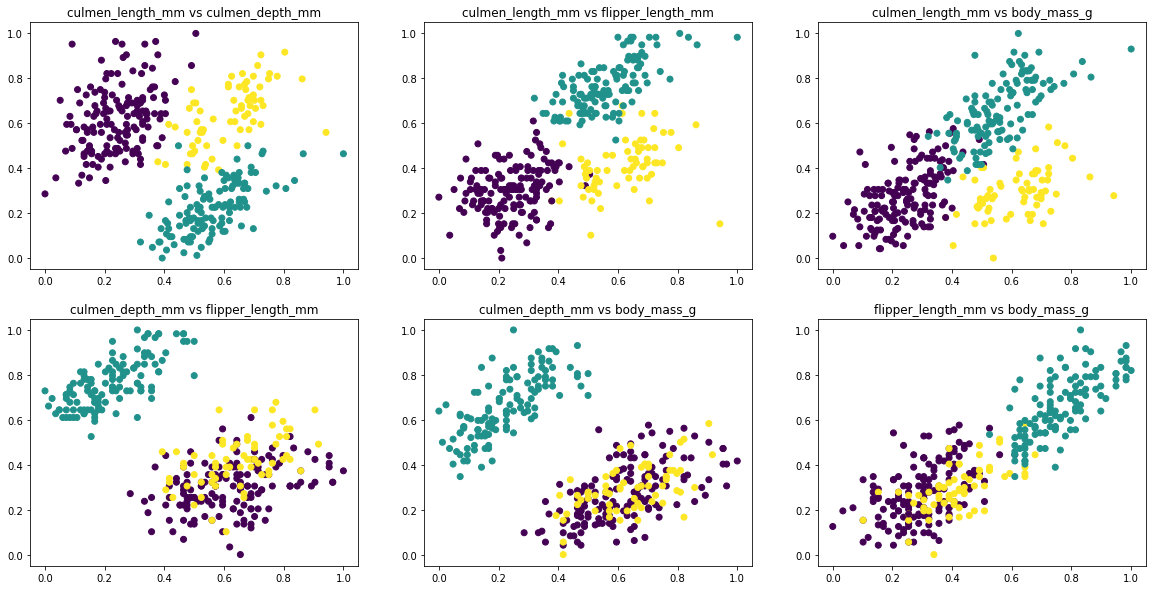

In [7]:
# Initialise the subplot function using number of rows and columns 
figure, axis = plt.subplots(2, 3)

# set size of the plot
figure.set_figwidth(20)
figure.set_figheight(10)
  
# For 'culmen_length_mm' vs 'culmen_depth_mm' 
axis[0, 0].scatter(frame['culmen_length_mm'], frame['culmen_depth_mm'], c = frame['cluster']) 
axis[0, 0].set_title("culmen_length_mm vs culmen_depth_mm") 
  
# For 'culmen_length_mm' vs 'flipper_length_mm'
axis[0, 1].scatter(frame['culmen_length_mm'], frame['flipper_length_mm'], c = frame['cluster']) 
axis[0, 1].set_title("culmen_length_mm vs flipper_length_mm")  
  
# For 'culmen_length_mm' vs 'body_mass_g'
axis[0, 2].scatter(frame['culmen_length_mm'], frame['body_mass_g'], c = frame['cluster']) 
axis[0, 2].set_title("culmen_length_mm vs body_mass_g")  
  
# For 'culmen_depth_mm' vs 'flipper_length_mm' 
axis[1, 0].scatter(frame['culmen_depth_mm'], frame['flipper_length_mm'], c = frame['cluster']) 
axis[1, 0].set_title("culmen_depth_mm vs flipper_length_mm")

# For 'culmen_depth_mm' vs 'body_mass_g'
axis[1, 1].scatter(frame['culmen_depth_mm'], frame['body_mass_g'], c = frame['cluster']) 
axis[1, 1].set_title("culmen_depth_mm vs body_mass_g")  
  
# For 'flipper_length_mm' vs 'body_mass_g' 
axis[1, 2].scatter(frame['flipper_length_mm'], frame['body_mass_g'], c = frame['cluster']) 
axis[1, 2].set_title("flipper_length_mm vs body_mass_g")
  
# Combine all the operations and display
plt.show() 

# Klasyfikacja

In [38]:
def EM(X, Y):
    # split data
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

    # train EM and classify
    gmm = GaussianMixture(n_components = 3)
    gmm.fit(x_train)
    train_pred = gmm.predict(x_train)
    test_pred = gmm.predict(x_test)

    # create test table
    Test = x_test.join(y_test)
    Test['test_pred'] = test_pred

    # create train table
    Train = x_train.join(y_train)
    Train['train_pred'] = train_pred

    # split the train table by species
    gentoo = Train.loc[Train['species'] == 'Gentoo']
    adelie = Train.loc[Train['species'] == 'Adelie']
    chinstrap = Train.loc[Train['species'] == 'Chinstrap']

    # find out which cluster is which species from train table
    gentoo_cluster = gentoo['train_pred'].value_counts().idxmax()
    adelie_cluster = adelie['train_pred'].value_counts().idxmax()
    chinstrap_cluster = chinstrap['train_pred'].value_counts().idxmax()

    # get the corectly classified penguins from test table
    positive_gentoo = Test[(Test['species'] == 'Gentoo') & (Test['test_pred'] == gentoo_cluster)]
    positive_adelie = Test[(Test['species'] == 'Adelie') & (Test['test_pred'] == adelie_cluster)]
    positive_chinstrap = Test[(Test['species'] == 'Chinstrap') & (Test['test_pred'] == chinstrap_cluster)]

    # count corectly classified penguins
    positive = (len(positive_gentoo) + len(positive_adelie) + len(positive_chinstrap))/len(T)
    #print("procent \"poprawnie\" sklasyfikowanych pingwinów = ", round(positive,4)*100, "%")

    return round(positive,6)*100

In [46]:
# load data
data = pd.read_csv("penguins_size.csv")
data = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species'])
data = data.dropna()

X = pd.DataFrame(data, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

Y = pd.DataFrame(data, columns = ['species'])

# normalize
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())


wyniki_em = []
for i in tqdm(range(100)):
    wyniki_em.append(EM(X, Y))
    
print(f"Średni wynik = {np.mean(wyniki_em)} %")
print(f"Maksymalny wynik = {np.amax(wyniki_em)} %")
print(f"Minimalny wynik = {np.amin(wyniki_em)} %")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 60.93it/s]


Średni wynik = 92.300971 %
Maksymalny wynik = 100.0 %
Minimalny wynik = 81.5534 %
